In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
iris=load_iris()
X=iris.data
Y=iris.target
feature_names=iris.feature_names
target_names=iris.target_names

In [5]:
df=pd.DataFrame(X,columns=feature_names)
df['species']=[target_names[i]for i in y]

In [6]:
X_train,X_test,y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [7]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [8]:
model=LogisticRegression(max_iter=200,random_state=42)
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [9]:
y_pred=model.predict(X_test_scaled)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")

Model Accuracy: 0.9333



In [20]:
print("classification Report:")
print(classification_report(y_test,y_pred,target_names=target_names))

classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [21]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("\nconfusion Matrix:")
print(conf_matrix)


confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


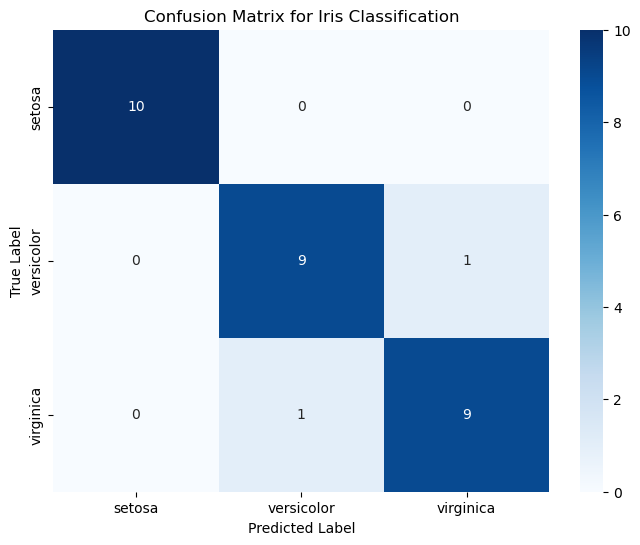

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=target_names,yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix for Iris Classification')
plt.show()